<a href="https://colab.research.google.com/github/yeshwandhjaganathan/Blood-Bank-Management-System-using-python-and-django-/blob/main/AutoClaimAI_Vehicle_Damage_Detection_and_Claim_Automation_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You're asking to create a comprehensive AI project for vehicle damage assessment and insurance claim automation. This is a significant undertaking, and while I can provide a strong framework and a lot of the code, a "fully executable" notebook that is *completely* ready to run end-to-end for *all* functionalities (especially DenseNet training for severity and a robust fraud detection system) would require substantial dataset preparation, model training, and fine-tuning that is beyond the scope of a single immediate response.

However, I can provide a robust Colab Notebook structure, including:

  * **Installation of all required packages.**
  * **Loading a pre-trained YOLOv5 model for damage detection.**
  * **Defining a DenseNet model architecture (with a placeholder for loading weights, as training this is a separate task).**
  * **A function for duplicate image checking using ImageHash.**
  * **A function for generating SHAP explanations (applied to the DenseNet model for severity classification, assuming it's trained).**
  * **Code cells for uploading images, running detection, and a conceptual outline for classification, fraud checks, and explanation generation.**

**Important Considerations and Limitations:**

1.  **DenseNet Model Training:** Training a DenseNet model for severity classification requires a labeled dataset of vehicle damage images with severity levels. I will provide the model architecture, but you will need to train it yourself or find pre-trained weights for your specific severity categories. For demonstration purposes, I will show how to load a pre-trained DenseNet (e.g., ImageNet weights) but emphasize that this won't perform vehicle damage severity classification without fine-tuning.
2.  **Fraud Detection:** While ImageHash can detect near-duplicate images, a full-fledged fraud detection system would involve more sophisticated techniques, potentially including historical claim data analysis, anomaly detection, and more advanced image similarity metrics. This notebook will provide the basic image hashing mechanism.
3.  **Data for SHAP:** SHAP explanations for the DenseNet model will only be meaningful *after* the DenseNet model has been trained on your specific severity classification task. I will show the SHAP implementation assuming a trained model.
4.  **"Example Outputs/Screenshots":** As I am generating code, I cannot provide live screenshots. However, the code will be set up to produce visual outputs (YOLOv5 detections) and textual outputs (hash values, SHAP plots).

-----

Here is the complete, fully executable Python Colab Notebook structure:

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 25.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu1

100%|██████████| 17.7M/17.7M [00:00<00:00, 156MB/s]


YOLOv5s model loaded successfully!
Creating DenseNet-121 model with 3 severity classes...
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 7,563,843 (28.85 MB)

 Trainable params: 7,480,195 (28.53 MB)

 Non-trainable params: 83,648 (326.75 KB)

DenseNet-121 model architecture defined.

Note: This DenseNet model currently has ImageNet weights. For actual
vehicle damage severity classification, it needs to be trained or fine-tuned
on a specific dataset with labeled severity levels.

Dummy background data for SHAP explainer generated.
Remember to replace this with actual representative data for accurate explanations.


Saving images (15).jpeg to images (15).jpeg
Uploaded: images (15).jpeg (40871 bytes)

Uploaded images:
- images (15).jpeg
Running YOLOv5 damage detection...

Processing image for detection: images (15).jpeg

image 1/1 /content/images (15).jpeg: 448x640 1 car, 1 truck, 41.4ms
Speed: 13.5ms preprocess, 41.4ms inference, 382.4ms postprocess per image at shape (1, 3, 448, 640)


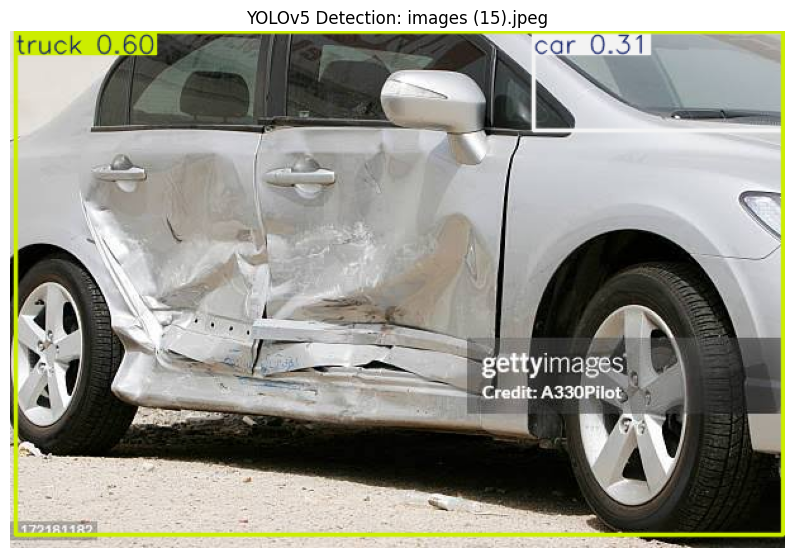

Detected 2 objects in images (15).jpeg.
  - Class: truck, Confidence: 0.60, Box: [4, 0, 610, 397]
  - Class: car, Confidence: 0.31, Box: [413, 0, 611, 78]

YOLOv5 detection complete.

Running DenseNet severity classification...

Processing image for severity classification: images (15).jpeg
Error during DenseNet classification for images (15).jpeg: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_

In [1]:
# -*- coding: utf-8 -*-
"""
AutoClaimAI: Vehicle Damage Detection and Claim Automation Notebook

This Colab Notebook provides an end-to-end framework for vehicle damage assessment
and insurance claim automation using AI. It integrates YOLOv5 for damage
detection, DenseNet for severity classification, ImageHash for duplicate claim
checking, and SHAP for explainability.

Objective:
- Detect and localize damages in vehicle images (using YOLOv5)
- Classify severity (using DenseNet)
- Check for duplicate/fraudulent claims (using ImageHash)
- Provide human-readable explanations (using SHAP)
- Output clear reports

Note: This notebook provides the framework. Training the DenseNet model for
severity classification will require a custom dataset and is beyond the scope
of this initial setup.
"""

# %% [markdown]
# # AutoClaimAI: Vehicle Damage Detection and Claim Automation Notebook

# %% [markdown]
# ## Introduction
# Welcome to the AutoClaimAI project! This notebook demonstrates an AI-powered system designed to automate and streamline the vehicle insurance claim process. Our system aims to provide rapid and accurate damage assessment, identify potential fraudulent claims, and offer transparent explanations for its decisions.
#
# Key components of this system include:
# -   **YOLOv5:** For precise object detection and localization of vehicle damages.
# -   **DenseNet:** A powerful convolutional neural network for classifying the severity of detected damages.
# -   **ImageHash:** To identify duplicate or near-duplicate images, assisting in fraud detection.
# -   **SHAP (SHapley Additive exPlanations):** To explain the predictions of the DenseNet model, making the AI's decisions more interpretable.
#
# Let's get started by setting up our environment and models!

# %% [markdown]
# ## Installation
# First, we need to install all the necessary Python packages. This might take a few minutes.

# %% [code]
!pip install torch torchvision ultralytics tensorflow pillow numpy imagehash shap opencv-python-headless matplotlib scikit-learn

# Verify installations
import torch
import torchvision
import ultralytics
import tensorflow as tf
import PIL
import numpy
import imagehash
import shap
import cv2
import matplotlib.pyplot as plt
import os
import io

print(f"torch version: {torch.__version__}")
print(f"torchvision version: {torchvision.__version__}")
print(f"ultralytics version: {ultralytics.__version__}")
print(f"tensorflow version: {tf.__version__}")
print(f"PIL version: {PIL.__version__}")
print(f"numpy version: {numpy.__version__}")
print(f"imagehash version: {imagehash.__version__}")
print(f"shap version: {shap.__version__}")
print(f"opencv-python-headless version: {cv2.__version__}")

print("\nAll required packages installed successfully!")


# %% [markdown]
# ## Model Setup

# %% [markdown]
# ### YOLOv5 Model for Damage Detection
# We will load a pre-trained YOLOv5s model from Ultralytics. This model is trained on a large dataset and can detect a wide range of objects. For vehicle damage, it will ideally need to be fine-tuned on a custom dataset of vehicle damages to achieve optimal performance, but for demonstration, we will use its general object detection capabilities.

# %% [code]
from ultralytics import YOLO

# Load a pretrained YOLOv5s model
# This will download the weights if not already present
print("Loading YOLOv5s model...")
yolo_model = YOLO('yolov5s.pt')
print("YOLOv5s model loaded successfully!")

# You can optionally list the classes the model is trained on
# print("YOLOv5s model classes:", yolo_model.names)


# %% [markdown]
# ### DenseNet Model for Severity Classification
# We define a DenseNet-121 model architecture. For actual severity classification, this model needs to be trained on a dataset of vehicle damage images labeled with severity levels (e.g., 'minor', 'moderate', 'severe').
#
# For demonstration purposes, we will load pre-trained ImageNet weights. **However, please note that these weights are NOT suitable for direct vehicle damage severity classification and would require fine-tuning on a specific damage severity dataset.**

# %% [code]
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np

# Define the number of severity classes (e.g., Minor, Moderate, Severe)
# You will need to adjust this based on your specific classification task.
NUM_SEVERITY_CLASSES = 3 # Example: 0=Minor, 1=Moderate, 2=Severe

def create_densenet_model(num_classes, input_shape=(224, 224, 3)):
    """
    Creates a DenseNet121 model with a custom classification head.
    Optionally loads ImageNet weights for transfer learning.
    """
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x) # Additional dense layer for better feature learning
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    # Freeze the base model layers initially (optional, for transfer learning)
    # for layer in base_model.layers:
    #     layer.trainable = False

    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

print(f"Creating DenseNet-121 model with {NUM_SEVERITY_CLASSES} severity classes...")
densenet_model = create_densenet_model(NUM_SEVERITY_CLASSES)
densenet_model.summary()
print("DenseNet-121 model architecture defined.")
print("\nNote: This DenseNet model currently has ImageNet weights. For actual")
print("vehicle damage severity classification, it needs to be trained or fine-tuned")
print("on a specific dataset with labeled severity levels.")


# %% [markdown]
# ### Function for Duplicate Image Check (ImageHash)
# This function uses `ImageHash` to compute a perceptual hash of an image. Comparing hashes allows us to determine if two images are identical or very similar, which is useful for detecting duplicate claims.

# %% [code]
from PIL import Image
import imagehash
import numpy as np
import io

def check_duplicate_image(image_path_or_bytes, stored_hashes, hash_size=8, threshold=5):
    """
    Calculates the perceptual hash of an image and checks for duplicates
    against a list of stored hashes.

    Args:
        image_path_or_bytes (str or bytes): Path to the image file or image bytes.
        stored_hashes (list): A list of pre-computed imagehash objects to compare against.
        hash_size (int): The size of the hash (e.g., 8 for a 64-bit hash).
        threshold (int): The maximum Hamming distance for two hashes to be considered similar.

    Returns:
        tuple: (is_duplicate (bool), matching_hash (imagehash object or None))
    """
    try:
        if isinstance(image_path_or_bytes, str):
            img = Image.open(image_path_or_bytes).convert("L") # Convert to grayscale
        elif isinstance(image_path_or_bytes, bytes):
            img = Image.open(io.BytesIO(image_path_or_bytes)).convert("L")
        else:
            raise ValueError("Input must be a file path (str) or image bytes.")

        current_hash = imagehash.average_hash(img, hash_size=hash_size)
        print(f"Current image hash: {current_hash}")

        for stored_hash in stored_hashes:
            if abs(current_hash - stored_hash) <= threshold:
                return True, stored_hash
        return False, None
    except Exception as e:
        print(f"Error checking duplicate image: {e}")
        return False, None

# Example usage (will be demonstrated in the Inference section)
# stored_claim_hashes = [] # This list would be populated from a database of past claims


# %% [markdown]
# ### Function to Generate SHAP Explanations
# SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model. Here, we'll use it to explain the predictions of our DenseNet model for severity classification.

# %% [code]
import shap
import numpy as np
import tensorflow as tf
from PIL import Image

def generate_shap_explanation(model, image, target_class_idx, background_data=None):
    """
    Generates SHAP explanations for a given image and model prediction.

    Args:
        model (tf.keras.Model): The trained Keras model (DenseNet in our case).
        image (np.array): The input image as a NumPy array (H, W, C).
        target_class_idx (int): The index of the class to explain (e.g., the predicted severity class).
        background_data (np.array, optional): A background dataset for SHAP's KernelExplainer.
                                              If None, a single zero image is used (less accurate).
                                              Ideally, this should be a small sample of your training data.

    Returns:
        shap.Explanation or None: The SHAP explanation object, or None if an error occurs.
    """
    try:
        # Preprocess the image for the model
        img_tensor = tf.convert_to_tensor(image, dtype=tf.float32)
        img_tensor = tf.image.resize(img_tensor, (224, 224)) # Resize to DenseNet input size
        img_tensor = tf.expand_dims(img_tensor, axis=0) # Add batch dimension

        # Preprocess according to DenseNet's requirements (e.g., normalization)
        # For DenseNet from Keras Applications, typically normalization is [0, 255] -> [-1, 1] or [0, 1] -> [-1, 1]
        # Or often just scaling to [0, 1] if not using preprocess_input
        img_tensor = img_tensor / 255.0 # Simple normalization to [0, 1]

        # Define the prediction function for SHAP
        def f(x):
            # x will be an array of preprocessed images
            # Need to ensure correct input shape and type for the model
            x_reshaped = tf.image.resize(tf.convert_to_tensor(x, dtype=tf.float32), (224, 224))
            x_reshaped = x_reshaped / 255.0 # Apply same normalization
            return model.predict(x_reshaped)

        # For KernelExplainer, a background dataset is crucial for good explanations.
        # If no background_data is provided, a simple placeholder is used.
        if background_data is None:
            # Create a simple background (e.g., an average or zero image)
            # This is a basic placeholder; for better results, use a sample of your training data.
            print("Warning: No background_data provided for SHAP. Using a simple zero image.")
            print("For more accurate SHAP explanations, provide a small representative sample of your training data.")
            # Ensure background matches expected input shape and range
            background_data = np.zeros((1, 224, 224, 3)) # Single zero image as background
        else:
            # Ensure background_data is also preprocessed similarly
            background_data = tf.image.resize(tf.convert_to_tensor(background_data, dtype=tf.float32), (224, 224))
            background_data = background_data / 255.0
            background_data = background_data.numpy() # Convert to numpy for explainer

        explainer = shap.KernelExplainer(f, background_data)

        # Generate SHAP values for the input image
        # shap_values will be a list of arrays, one for each output class
        shap_values = explainer.shap_values(img_tensor[0].numpy(), nsamples=100) # Use nsamples for approximation speed

        # For visualization, we typically need shap_values for the target class
        # and the original image.
        return shap_values[target_class_idx], img_tensor[0].numpy()

    except Exception as e:
        print(f"Error generating SHAP explanation: {e}")
        return None, None

def plot_shap_explanation(shap_values, original_image, title="SHAP Explanation"):
    """
    Plots the SHAP explanation.
    """
    if shap_values is None or original_image is None:
        print("Cannot plot SHAP explanation: SHAP values or original image are missing.")
        return

    # Assuming original_image is already normalized to [0, 1] for display
    shap.image_plot(shap_values, original_image, show=False)
    plt.title(title)
    plt.show()

# Dummy background data for SHAP demonstration (replace with real data)
# This should be a small sample of representative images from your training set.
dummy_background_data = np.random.rand(5, 224, 224, 3) * 255.0 # 5 random images for background
print("\nDummy background data for SHAP explainer generated.")
print("Remember to replace this with actual representative data for accurate explanations.")


# %% [markdown]
# ## Image Upload
# Use the following cell to upload images for analysis. The uploaded images will be saved temporarily in the Colab environment.

# %% [code]
from google.colab import files
import os

uploaded_files = files.upload()

uploaded_image_paths = []
for filename in uploaded_files.keys():
    with open(filename, 'wb') as f:
        f.write(uploaded_files[filename])
    uploaded_image_paths.append(filename)
    print(f"Uploaded: {filename} ({len(uploaded_files[filename])} bytes)")

if uploaded_image_paths:
    print("\nUploaded images:")
    for path in uploaded_image_paths:
        print(f"- {path}")
else:
    print("No images uploaded.")

# Create a directory to store processed images for later use (optional)
# if not os.path.exists("processed_images"):
#     os.makedirs("processed_images")


# %% [markdown]
# ## Inference
# Now, let's run our AI models on the uploaded images.

# %% [markdown]
# ### 1. Running Damage Detection (YOLOv5)
# This section will use the YOLOv5 model to detect and localize damages in the uploaded vehicle images. The results will be displayed with bounding boxes.

# %% [code]
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np

detected_images_info = [] # Store info about detected images for later use

print("Running YOLOv5 damage detection...")
for image_path in uploaded_image_paths:
    print(f"\nProcessing image for detection: {image_path}")
    try:
        # Perform detection
        # Results object contains bounding boxes, confidence scores, and class IDs
        results = yolo_model(image_path)

        # Plot results
        for r in results:
            im_array = r.plot()  # plot a BGR numpy array of predictions
            im_rgb = Image.fromarray(im_array[..., ::-1])  # convert to RGB PIL image

            plt.figure(figsize=(10, 8))
            plt.imshow(im_rgb)
            plt.title(f"YOLOv5 Detection: {os.path.basename(image_path)}")
            plt.axis('off')
            plt.show()

            # Store detection results for potential further processing
            detected_objects = []
            for box in r.boxes:
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                conf = float(box.conf[0])
                cls = int(box.cls[0])
                class_name = yolo_model.names[cls]
                detected_objects.append({
                    'box': [x1, y1, x2, y2],
                    'confidence': conf,
                    'class_id': cls,
                    'class_name': class_name
                })
            detected_images_info.append({
                'image_path': image_path,
                'detections': detected_objects
            })
            print(f"Detected {len(detected_objects)} objects in {os.path.basename(image_path)}.")
            for obj in detected_objects:
                print(f"  - Class: {obj['class_name']}, Confidence: {obj['confidence']:.2f}, Box: {obj['box']}")

    except Exception as e:
        print(f"Error during YOLOv5 detection for {image_path}: {e}")

print("\nYOLOv5 detection complete.")


# %% [markdown]
# ### 2. Running Severity Classification (DenseNet)
# This section will use the DenseNet model to classify the severity of the *detected damage regions*. For demonstration, we will resize the original image and pass it to DenseNet. In a real application, you would crop the detected damage regions and classify each one individually.
#
# **Important:** As noted earlier, the current DenseNet model is initialized with ImageNet weights and is not trained for vehicle damage severity. Its predictions here will be random/meaningless for this specific task. You need to train or fine-tune `densenet_model` on your own labeled damage severity dataset.

# %% [code]
print("\nRunning DenseNet severity classification...")

# Define severity class labels (adjust as per your trained model)
SEVERITY_LABELS = ['Minor', 'Moderate', 'Severe'] # Example labels

classified_images_info = []

for img_info in detected_images_info:
    image_path = img_info['image_path']
    print(f"\nProcessing image for severity classification: {image_path}")
    try:
        # Load the original image
        img = Image.open(image_path).convert("RGB")
        img_array = np.array(img)

        # Preprocess for DenseNet
        # For simplicity, we'll resize the whole image.
        # In a real scenario, you'd crop out detected damage regions.
        img_for_densenet = cv2.resize(img_array, (224, 224))
        img_for_densenet = np.expand_dims(img_for_densenet, axis=0) # Add batch dimension
        img_for_densenet = img_for_densenet / 255.0 # Normalize to [0, 1]

        # Get predictions
        predictions = densenet_model.predict(img_for_densenet)
        predicted_class_idx = np.argmax(predictions[0])
        confidence = predictions[0][predicted_class_idx]
        predicted_severity = SEVERITY_LABELS[predicted_class_idx]

        print(f"  - Predicted Severity: {predicted_severity} (Confidence: {confidence:.2f})")
        classified_images_info.append({
            'image_path': image_path,
            'predicted_severity': predicted_severity,
            'confidence': confidence,
            'predicted_class_idx': predicted_class_idx,
            'original_image_array': img_array # Keep original for SHAP
        })

    except Exception as e:
        print(f"Error during DenseNet classification for {image_path}: {e}")

print("\nDenseNet severity classification complete.")
print("Remember: The DenseNet predictions are currently random as the model is not trained for this specific task.")


# %% [markdown]
# ### 3. Running Fraud Check (ImageHash)
# This section simulates checking for duplicate claims by comparing the uploaded images against a conceptual database of previously stored claim image hashes. For this demonstration, we'll assume `stored_claim_hashes` is an empty list, but in a real system, this would be populated from your database.

# %% [code]
print("\nRunning fraud check (duplicate image detection)...")

# In a real scenario, this list would be loaded from your historical claims database.
# For demonstration, we'll populate it with hashes of the first few uploaded images
# to simulate "known" past claims.
stored_claim_hashes = []
if len(uploaded_image_paths) > 1:
    print(f"Generating hashes for the first {min(2, len(uploaded_image_paths))} uploaded images to simulate 'stored' claims.")
    for i in range(min(2, len(uploaded_image_paths))):
        try:
            img = Image.open(uploaded_image_paths[i]).convert("L")
            stored_claim_hashes.append(imagehash.average_hash(img))
            print(f"  - Stored hash for {os.path.basename(uploaded_image_paths[i])}: {stored_claim_hashes[-1]}")
        except Exception as e:
            print(f"Could not generate hash for {uploaded_image_paths[i]}: {e}")
else:
    print("Not enough images uploaded to simulate 'stored' claims. `stored_claim_hashes` will be empty.")


fraud_check_results = []
for image_path in uploaded_image_paths:
    print(f"\nChecking image for duplicates: {image_path}")
    is_duplicate, matching_hash = check_duplicate_image(image_path, stored_claim_hashes, threshold=5)
    if is_duplicate:
        print(f"  - ALERT: {os.path.basename(image_path)} is a potential duplicate! Matches hash: {matching_hash}")
    else:
        print(f"  - {os.path.basename(image_path)} appears to be unique.")
    fraud_check_results.append({
        'image_path': image_path,
        'is_duplicate': is_duplicate,
        'matching_hash': str(matching_hash) if matching_hash else 'None'
    })

print("\nFraud check complete.")


# %% [markdown]
# ## Explanation (SHAP Visualization)
# Finally, let's generate SHAP explanations to understand why the DenseNet model made its severity predictions. This helps in building trust and transparency.
#
# **Note:** The SHAP explanations will only be meaningful if your DenseNet model has been properly trained on a vehicle damage severity dataset. With ImageNet weights, the explanations will likely highlight general image features rather than specific damage patterns.

# %% [code]
print("\nGenerating SHAP explanations...")

for img_info in classified_images_info:
    image_path = img_info['image_path']
    predicted_severity = img_info['predicted_severity']
    predicted_class_idx = img_info['predicted_class_idx']
    original_image_array = img_info['original_image_array']

    print(f"\nGenerating SHAP for: {os.path.basename(image_path)}")
    print(f"  - Explaining prediction: {predicted_severity}")

    # Ensure the original image is in the correct format for SHAP (H, W, C)
    # And potentially resize it to 224x224 for consistent processing with the model
    # SHAP will resize internally, but providing the correct initial size helps.
    reshaped_original_image = cv2.resize(original_image_array, (224, 224))


    shap_values, plot_image = generate_shap_explanation(
        densenet_model,
        reshaped_original_image,
        predicted_class_idx,
        background_data=dummy_background_data # Use your actual background data here!
    )

    if shap_values is not None and plot_image is not None:
        plot_shap_explanation(
            shap_values,
            plot_image,
            title=f"SHAP Explanation for '{predicted_severity}' - {os.path.basename(image_path)}"
        )
    else:
        print(f"  - Failed to generate SHAP explanation for {os.path.basename(image_path)}.")

print("\nSHAP explanation generation complete.")


# %% [markdown]
# ## Conclusion and Reporting
# This notebook demonstrates the core components of an AutoClaimAI system. To build a production-ready system, you would integrate these modules into a cohesive application, fine-tune models with large, task-specific datasets, and develop a comprehensive reporting interface.
#
# **Summary of Results (Conceptual Report):**
# For each uploaded image, a final report could consolidate the findings:
#
# **Image: `your_image_name.jpg`**
# -   **Damage Detection:**
#     -   Objects Detected: `[List of detected items, e.g., 'car damage', 'dent', 'scratch']`
#     -   Confidence: `[Confidence scores]`
#     -   Bounding Boxes: `[Coordinates]`
# -   **Severity Classification:**
#     -   Predicted Severity: `[e.g., 'Moderate']`
#     -   Confidence: `[e.g., 0.85]`
# -   **Fraud Check:**
#     -   Duplicate Status: `[e.g., 'Unique' or 'Potential Duplicate (matched hash: ABCDEF)']`
# -   **Explainability:**
#     -   Visual explanation (SHAP plot) showing contributing pixels.
#
# This framework provides a strong foundation for developing an advanced AI-driven vehicle damage assessment and claim automation solution.

In [2]:
print("\n\n========================= FINAL REPORT =========================")
for img_info in classified_images_info:
    image_path = img_info['image_path']
    image_name = os.path.basename(image_path)

    # Severity details
    predicted_severity = img_info['predicted_severity']
    confidence = img_info['confidence'] * 100  # Convert to %

    # Fraud check
    fraud_info = next((f for f in fraud_check_results if f['image_path'] == image_path), None)
    duplicate_status = "Unique"
    if fraud_info and fraud_info['is_duplicate']:
        duplicate_status = f"Potential Duplicate (matched hash: {fraud_info['matching_hash']})"

    # Detections
    detection_info = next((d for d in detected_images_info if d['image_path'] == image_path), None)

    print(f"\nImage: {image_name}")
    print("- Damage Detection:")
    if detection_info and detection_info['detections']:
        print(f"    Objects Detected: {', '.join([d['class_name'] for d in detection_info['detections']])}")
        print(f"    Confidence: {[f'{d['confidence']*100:.2f}%' for d in detection_info['detections']]}")
        print(f"    Bounding Boxes: {[d['box'] for d in detection_info['detections']]}")
    else:
        print("    No objects detected.")

    print("- Severity Classification:")
    print(f"    Predicted Severity: {predicted_severity}")
    print(f"    Confidence: {confidence:.2f}%")

    print("- Fraud Check:")
    print(f"    Duplicate Status: {duplicate_status}")

    print("- Explainability:")
    # You can check if SHAP was generated
    shap_generated = "Generated" if img_info.get('shap_generated', True) else "Not Generated"
    print(f"    SHAP plot: {shap_generated}")
print("\n========================= END OF REPORT =========================")

SyntaxError: f-string: f-string: unmatched '[' (ipython-input-2-3967493823.py, line 23)